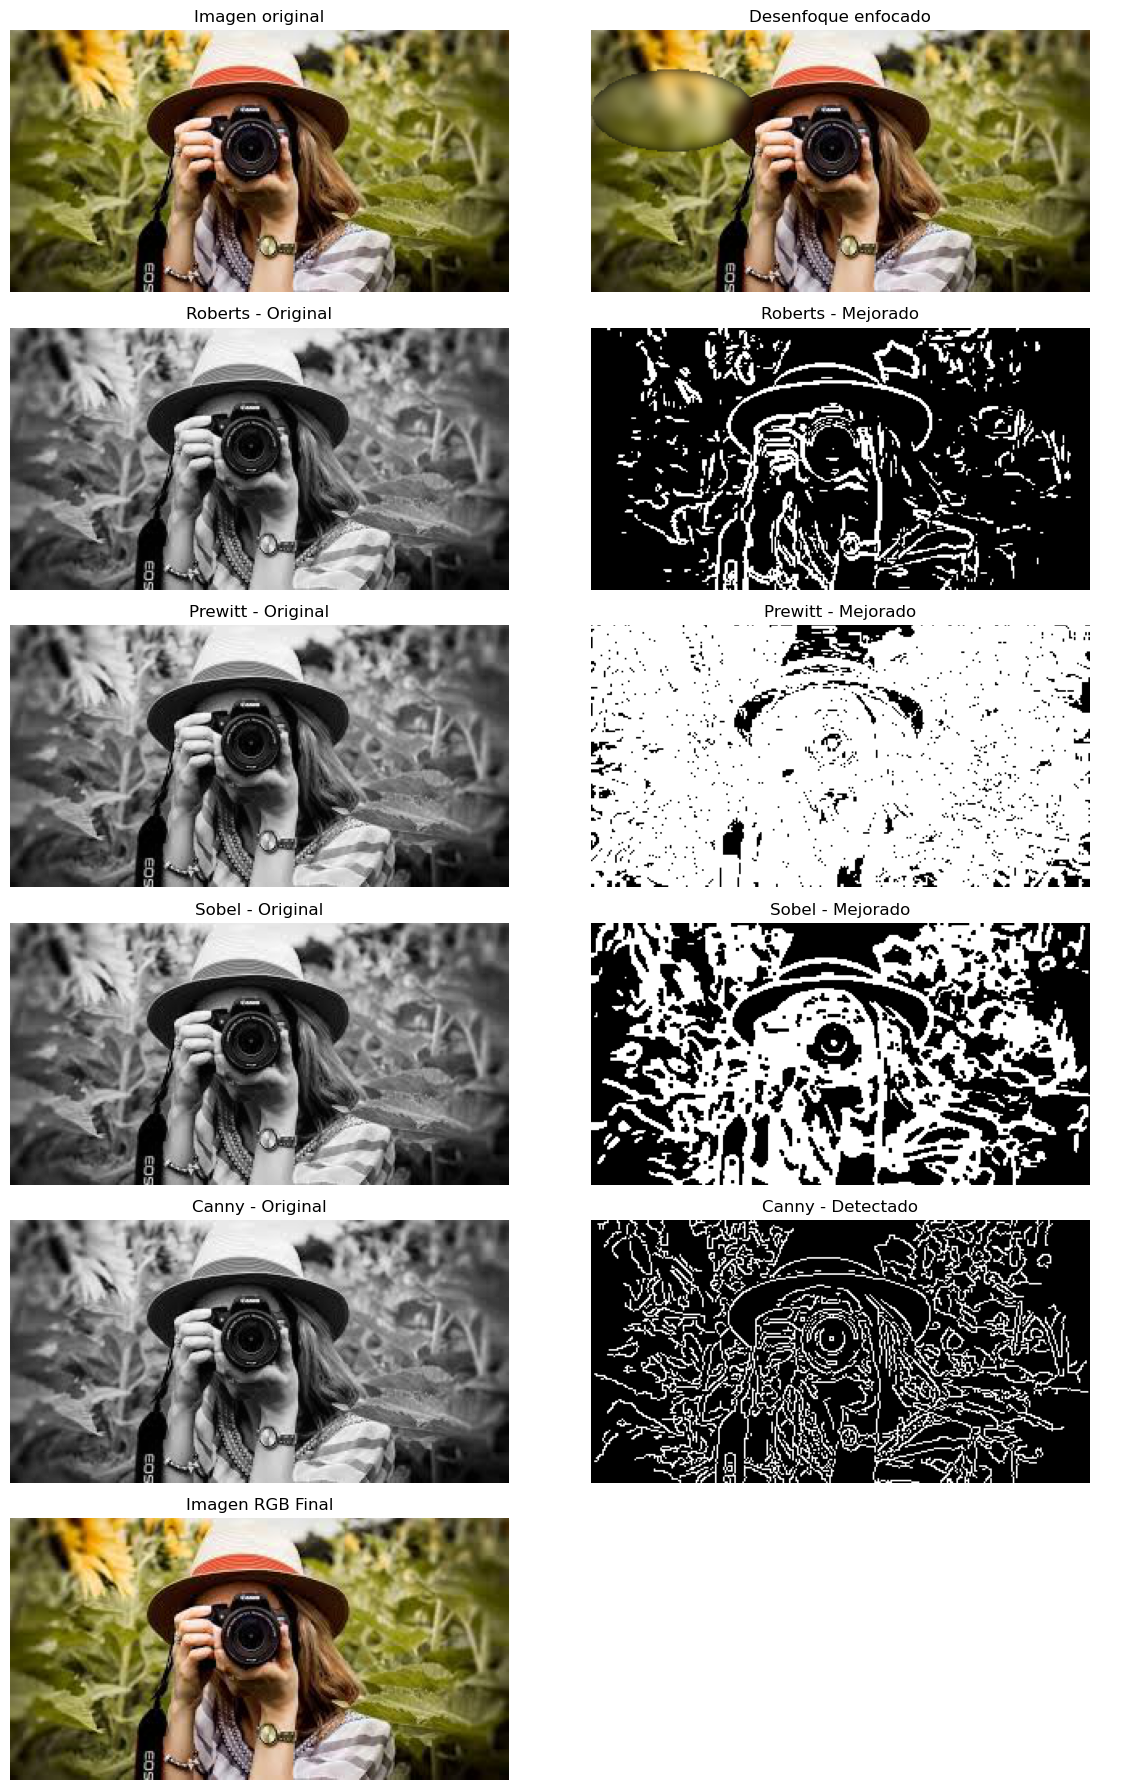

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


imagen = cv2.imread("img2.jpg")
imggray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

def roberts_mejorado(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    suavizado = cv2.GaussianBlur(img_gray, (3,3), 0)
    kernelx = np.array([[1, 0], [0, -1]], dtype=np.float32)
    kernely = np.array([[0, 1], [-1, 0]], dtype=np.float32)
    robx = cv2.filter2D(suavizado, cv2.CV_32F, kernelx)
    roby = cv2.filter2D(suavizado, cv2.CV_32F, kernely)
    roberts = cv2.addWeighted(np.abs(robx), 0.7, np.abs(roby), 0.7, 0)
    _, bordes = cv2.threshold(roberts, 30, 255, cv2.THRESH_BINARY)
    return bordes


def prewitt_mejor(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (3, 3), 0)
    prewittx = np.array([[3, 0, -3], [3, 0, -3], [3, 0, -3]], dtype=np.float32)
    prewitty = np.array([[3, 3, 3], [0, 0, 0], [-3, -3, -3]], dtype=np.float32)
    x = cv2.filter2D(img_gray, cv2.CV_64F, prewittx)
    y = cv2.filter2D(img_gray, cv2.CV_64F, prewitty)
    magnitud = np.sqrt(x**2 + y**2)
    _, bordes = cv2.threshold(magnitud, 30, 255, cv2.THRESH_BINARY)
    return bordes


def sobel_mejorado(imagen, tam_kernel=3, umbral=30):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (3, 3), 0)
    sabelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=tam_kernel)
    sabely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=tam_kernel)
    magnitud = np.sqrt(sabelx**2 + sabely**2)
    magnitud = cv2.normalize(magnitud, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    _, bordes = cv2.threshold(magnitud, umbral, 255, cv2.THRESH_BINARY)
    kernel_morf = np.ones((2, 2), np.uint8)
    bordes = cv2.morphologyEx(bordes, cv2.MORPH_CLOSE, kernel_morf)
    return bordes

def filtro_canny(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    return cv2.Canny(img_gray, 100, 200)

def desenfoque(img, centro, x, y):
    img1 = np.copy(img)
    valx, valy = centro
    mediox = x // 2
    medioy = y // 2
    mascara = np.zeros_like(img, dtype=np.uint8)
    cv2.ellipse(mascara, (valx, valy), (mediox, medioy), 0, 0, 360, (255, 255, 255), -1)
    img_mask = cv2.bitwise_and(img, mascara)
    desenfoque = cv2.GaussianBlur(img_mask, (25, 25), 0)
    img1[mascara != 0] = desenfoque[mascara != 0]
    return img1


fig, axs = plt.subplots(6, 2, figsize=(12, 18))


axs[0][0].imshow(imagen_rgb)
axs[0][0].set_title("Imagen original")
axs[0][0].axis("off")


desenfocada = desenfoque(imagen_rgb, (50, 50), 100, 50)
axs[0][1].imshow(desenfocada)
axs[0][1].set_title("Desenfoque enfocado")
axs[0][1].axis("off")


axs[1][0].imshow(imggray, cmap='gray')
axs[1][0].set_title("Roberts - Original")
axs[1][0].axis("off")
axs[1][1].imshow(roberts_mejorado(imagen), cmap='gray')
axs[1][1].set_title("Roberts - Mejorado")
axs[1][1].axis("off")

axs[2][0].imshow(imggray, cmap='gray')
axs[2][0].set_title("Prewitt - Original")
axs[2][0].axis("off")
axs[2][1].imshow(prewitt_mejor(imagen), cmap='gray')
axs[2][1].set_title("Prewitt - Mejorado")
axs[2][1].axis("off")


axs[3][0].imshow(imggray, cmap='gray')
axs[3][0].set_title("Sobel - Original")
axs[3][0].axis("off")
axs[3][1].imshow(sobel_mejorado(imagen), cmap='gray')
axs[3][1].set_title("Sobel - Mejorado")
axs[3][1].axis("off")

axs[4][0].imshow(imggray, cmap='gray')
axs[4][0].set_title("Canny - Original")
axs[4][0].axis("off")
axs[4][1].imshow(filtro_canny(imagen), cmap='gray')
axs[4][1].set_title("Canny - Detectado")
axs[4][1].axis("off")


axs[5][0].imshow(imagen_rgb)
axs[5][0].set_title("Imagen RGB Final")
axs[5][0].axis("off")
axs[5][1].axis("off")

plt.tight_layout()
plt.show()
